# # **Notebook: Introducción a la Ciencia de Datos con Python**
#### Por: Jennifer Grisales Casadiegos

## **Sección 1: Tipos de Series de Datos**

En ciencia de datos, podemos encontrarnos con:

- **Series temporales** (datos con un orden cronológico)
- **Series espaciales** (dependen de la ubicación geográfica)
- **Series categóricas** (divididas por categorías o clases)

En este taller, usamos datos de consumo de energía global (2000–2024), que a menudo se analizan como **series temporales** si contienen un campo de año/fecha, además de posibles variables categóricas (país, región) y numéricas (consumo).

### **Objetivo de esta Sección**
- Identificar los tipos de datos disponibles en el dataset: numéricos, categóricos, fechas, etc.  
- Diferenciar cómo tratar las **series de tiempo** y **series categóricas**.


In [2]:
# 1. Importar librerías esenciales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Opción para mostrar gráficas dentro de la notebook
%matplotlib inline

# 3. (Opcional) Ajustar la visualización de dataframes
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

### **Extensiones Comunes de Datasets**

En ciencia de datos, los archivos suelen venir en distintos **formatos**. Con `pandas`, puedes leer la mayoría de ellos con sus funciones integradas:

1. **CSV (Comma-Separated Values)**  
   - **Extensión**: `.csv`  
   - **Lectura en Pandas**:  
     ```python
     import pandas as pd
     df = pd.read_csv("archivo.csv")
     ```

2. **Excel**  
   - **Extensión**: `.xlsx` o `.xls`  
   - **Lectura en Pandas**:  
     ```python
     df = pd.read_excel("archivo.xlsx", sheet_name="Hoja1")
     ```
   - Ajusta `sheet_name` según la hoja que quieras leer.

3. **JSON (JavaScript Object Notation)**  
   - **Extensión**: `.json`  
   - **Lectura en Pandas**:  
     ```python
     df = pd.read_json("archivo.json")
     ```

4. **Archivo de texto plano (TXT)**  
   - **Extensión**: `.txt`  
   - **Lectura en Pandas**:
     ```python
     # Si tus datos están delimitados por comas, tabulaciones u otro carácter
     df = pd.read_csv("archivo.txt", delimiter="\t")  # Ejemplo: delimitador tab
     ```
   - Ajusta el `delimiter` según el carácter separador de columnas.

5. **Otros formatos**  
   - **HTML**: `pd.read_html("archivo.html")`  
   - **Pickle**: `pd.read_pickle("archivo.pkl")`  
   - **Parquet**: `pd.read_parquet("archivo.parquet")` (útil para grandes volúmenes de datos).

En cada caso, es posible añadir **parámetros adicionales** para especificar codificaciones (`encoding='utf-8'` o `latin-1`), separadores (`sep=','`), nombres de columnas (`names=[...]`), y mucho más. Los detalles se encuentan en la documentación oficial de PANDAS.


### **Carga del dataset**

En Google Colab podemos **subir** el CSV manualmente a la carpeta de trabajo, o bien **montar** Google Drive.  
1. Sube el CSV de Kaggle a la carpeta principal de Colab o a tu Google Drive.  
2. Actualiza la ruta del archivo en la siguiente celda de código para que coincida con donde se encuentra tu dataset.

---


In [4]:
# Actualiza la ruta a tu archivo CSV
#Dataset: https://www.kaggle.com/datasets/atharvasoundankar/global-energy-consumption-2000-2024
ruta_csv = "/global_energy_consumption.csv"

# Lectura del archivo CSV
df = pd.read_csv(ruta_csv)


**Análisis inicial de las columnas**  
Revisaremos el tipo de datos que presenta cada columna para saber si se trata de una **serie temporal** (año o fecha), series **numéricas** (consumo, producciones, etc.) y/o series **categóricas** (región, fuente de energía, país, etc.).

---


In [5]:
print("Dimensiones del DataFrame:", df.shape)
df.head(5)

Dimensiones del DataFrame: (10000, 10)


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


In [6]:
df.info()

print("\nColumnas del dataset:")
print(df.columns.to_list())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10000 non-null  object 
 1   Year                             10000 non-null  int64  
 2   Total Energy Consumption (TWh)   10000 non-null  float64
 3   Per Capita Energy Use (kWh)      10000 non-null  float64
 4   Renewable Energy Share (%)       10000 non-null  float64
 5   Fossil Fuel Dependency (%)       10000 non-null  float64
 6   Industrial Energy Use (%)        10000 non-null  float64
 7   Household Energy Use (%)         10000 non-null  float64
 8   Carbon Emissions (Million Tons)  10000 non-null  float64
 9   Energy Price Index (USD/kWh)     10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB

Columnas del dataset:
['Country', 'Year', 'Total Energy Consumption (TWh)', 'Per Ca

**Ejercicio**  
1. Basándote en la salida de `df.info()`, **clasifica** cada columna en:
   - **Temporal** (si existe un campo de fecha o año)
   - **Numérica**
   - **Espacial**
   - **Categórica**

2. ¿Hay alguna columna que se pueda convertir a tipo fecha (`datetime`)?

---


## **Sección 2: Análisis Exploratorio de Datos (EDA)**

### 2.1 Inspección y Estadísticas Descriptivas

**Objetivo**  
- Entender la **distribución** de los datos.
- Identificar valores máximos, mínimos, promedios, etc.

---


In [7]:

# Muestra las primeras 5 filas
display(df.head(5))

# Muestra 5 filas aleatorias
display(df.sample(5))

# Describe estadísticas de las columnas numéricas
display(df.describe())


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
905,Russia,2004,3049.78,2142.05,12.60,76.48,31.31,17.36,2353.19,0.43
9036,Russia,2009,4076.02,44970.39,30.02,66.88,54.81,38.61,1546.08,0.29
8343,China,2003,9969.42,20209.57,51.10,41.98,22.38,36.07,3606.90,0.06
17,Russia,2019,6762.79,11886.43,6.05,18.66,54.40,34.34,4728.25,0.47
4331,Brazil,2018,7094.12,11012.79,52.16,59.22,32.55,25.55,3657.34,0.10


,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2012.151400,5142.564425,25039.950516,47.322925,44.932851,40.057585,25.043290,2536.148007,0.273466
std,7.155236,2848.754040,14205.659284,24.603767,20.202800,11.538756,8.597024,1424.105067,0.130782
min,2000.000000,100.480000,500.270000,5.000000,10.010000,20.000000,10.000000,50.640000,0.050000
25%,2006.000000,2713.882500,12683.220000,26.110000,27.337500,30.217500,17.610000,1293.330000,0.160000
50%,2012.000000,5190.850000,25098.770000,47.150000,45.110000,39.980000,25.090000,2568.015000,0.270000
75%,2018.000000,7579.977500,37113.282500,68.682500,62.430000,50.150000,32.570000,3766.182500,0.390000
max,2024.000000,9999.260000,49989.570000,90.000000,80.000000,60.000000,40.000000,4999.340000,0.500000


**Ejercicio**  
1. Utiliza `df.tail()` para ver las últimas filas del DataFrame.  
2. Verifica si las estadísticas (`mean`, `max`, `min`) son coherentes.  

---


In [ ]:
valor_minimo = df['ColumnaX'].min()

### 2.2 Filtrado y Selección de datos

Necesitamos filtrar por país, región, o un rango de fechas, según el análisis que deseemos hacer.


In [12]:
# EJEMPLO: Filtrar filas si existe una columna 'Country' y queremos ver 'China'
# Ajusta el nombre de la columna y el valor a tu dataset
if 'Country' in df.columns:
    filtro_china = df[df['Country'] == 'China']
    print("Filas asociadas a China:")
    display(filtro_china.head())
else:
    print("No se encontró la columna 'Country'. Ajusta el ejemplo.")

# EJEMPLO: Seleccionar solo columnas específicas
columnas_interes = ['Year', 'Country', 'Energy Consumption']  # Ajusta a tu dataset
df_seleccion = df[columnas_interes] if set(columnas_interes).issubset(df.columns) else df
df_seleccion.head()


Filas asociadas a China:


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
16,China,2007,8454.46,29133.14,17.75,12.53,32.53,10.61,1917.96,0.44
19,China,2012,452.73,34886.27,31.67,26.79,20.10,28.56,4480.50,0.36
38,China,2024,7756.58,7753.56,8.00,49.94,55.32,24.84,3538.37,0.14
41,China,2024,4355.20,4044.79,8.41,35.68,58.82,28.64,3315.11,0.41
46,China,2023,500.96,49878.61,39.42,47.95,42.93,16.13,4325.60,0.44


,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


**Ejercicio**  
1. Filtra otro país (o región) para ver las primeras filas.  
2. Selecciona únicamente las columnas que te interesan y muestra las 10 primeras filas.

---


### 2.3 Agrupación y Agregación

Resumir datos por año, país o categoría para obtener promedios, sumas, conteos.


In [14]:
if 'Year' in df.columns and 'Energy Consumption' in df.columns:
    df_agrupado = df.groupby('Year')['Energy Consumption'].sum()
    print("Suma de consumo de energía por año:")
    display(df_agrupado.head())
else:
    print("Ajusta los nombres de columna según tu dataset para agrupar.")


Ajusta los nombres de columna según tu dataset para agrupar.


**Ejercicio**  
1. Prueba agrupar por `Country` y obtener la **media** de `Energy Consumption`.  
2. Asigna el resultado a una variable y utiliza `sort_values()` para ver los países con mayor o menor consumo promedio.

---


## **Sección 2.4: Visualización en EDA**

---



La visualización facilita **identificar patrones**, **outliers** y **tendencias**. Utilizaremos `matplotlib`.

### Gráficos frecuentes:
1. **Histogramas**: Dispersión de datos numéricos.  
2. **Barras**: Conteos de categorías o valores resumidos.  
3. **Scatter plots (dispersión)**: Relación entre dos variables numéricas.  
4. **Boxplots**: Detección de valores atípicos y distribución.

Un dataset para practicar visualización: https://www.kaggle.com/datasets/aemyjutt/salesdata/data

---


In [ ]:
import matplotlib.pyplot as plt

# Verifica si la columna 'Energy Consumption' existe
if 'Energy Consumption' in df.columns:
    plt.hist(df['Energy Consumption'].dropna(), bins=20)
    plt.title('Histograma - Energy Consumption')
    plt.xlabel('Consumo de Energía')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("Ajusta el nombre de la columna para el histograma.")


**Ejercicio**  
1. Ajusta el número de `bins` para ver cómo cambia la forma del histograma.  
2. Prueba hacer un histograma de otra columna numérica si existe.  

---


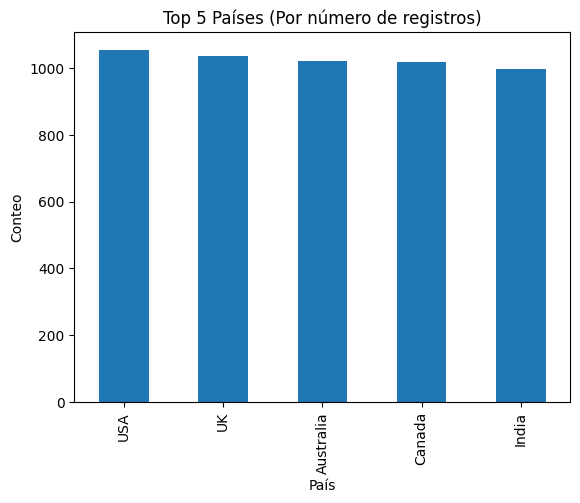

In [ ]:
# Ejemplo: Mostrar los 5 países con más registros (o un top de países)
if 'Country' in df.columns:
    top_paises = df['Country'].value_counts().head(5)
    top_paises.plot(kind='bar')
    plt.title('Top 5 Países (Por número de registros)')
    plt.xlabel('País')
    plt.ylabel('Conteo')
    plt.show()
else:
    print("Ajusta la columna 'Country' según tu dataset.")


**Ejercicio**  
1. Muestra un **top 10** en lugar del top 5.  
2. Si tu dataset tiene otra columna categórica (por ejemplo, `Region`), repite el ejercicio para ver cuántos registros hay por región.

---



In [ ]:
# Ejemplo: Relación entre 'Year' y 'Energy Consumption'
if 'Year' in df.columns and 'Energy Consumption' in df.columns:
    plt.scatter(df['Year'], df['Energy Consumption'])
    plt.title('Relación Año vs. Consumo de Energía')
    plt.xlabel('Año')
    plt.ylabel('Consumo de Energía')
    plt.show()
else:
    print("Ajusta los nombres de columna para el scatter plot.")


Ajusta los nombres de columna para el scatter plot.


**Ejercicio**  
1. Si tu dataset no tiene año, busca dos columnas numéricas y genera un scatter plot.  
2. Observa si hay tendencia positiva, negativa o no hay relación aparente.

---



In [ ]:
if 'Energy Consumption' in df.columns:
    plt.boxplot(df['Energy Consumption'].dropna())
    plt.title('Boxplot - Energy Consumption')
    plt.ylabel('Consumo de Energía')
    plt.show()
else:
    print("Ajusta el nombre de la columna para el boxplot.")


Ajusta el nombre de la columna para el boxplot.


**Ejercicio**  
1. Identifica si existen **outliers**.  
2. Intenta crear un boxplot para una columna distinta, como `Population` o `CO2 Emissions` (si tu dataset las contiene).  

---


## **Sección 3: Limpieza de Datos**

### Objetivo
- Detectar y manejar datos faltantes (NaN)
- Eliminar duplicados
- Ajustar tipos de datos

Podemos usar el dataset: https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training



---


In [ ]:
print("Valores nulos por columna:")
display(df.isnull().sum())

print("\nPorcentaje de nulos por columna:")
porcentaje_nulos = df.isnull().mean() * 100
display(porcentaje_nulos)


Valores nulos por columna:


,0
Country,0
Year,0
Total Energy Consumption (TWh),0
Per Capita Energy Use (kWh),0
Renewable Energy Share (%),0
Fossil Fuel Dependency (%),0
Industrial Energy Use (%),0
Household Energy Use (%),0
Carbon Emissions (Million Tons),0
Energy Price Index (USD/kWh),0



Porcentaje de nulos por columna:


,0
Country,0.0
Year,0.0
Total Energy Consumption (TWh),0.0
Per Capita Energy Use (kWh),0.0
Renewable Energy Share (%),0.0
Fossil Fuel Dependency (%),0.0
Industrial Energy Use (%),0.0
Household Energy Use (%),0.0
Carbon Emissions (Million Tons),0.0
Energy Price Index (USD/kWh),0.0


**Ejercicio**  
1. Identifica cuáles columnas tienen más de un 10% de valores nulos.  
2. Propón una estrategia de **imputación** o eliminación.

---


In [ ]:
# ==============================================
# Ejemplo de imputación
# ==============================================
# Copia del DataFrame
df_copia = df.copy()

# Imputamos con la media la columna 'Energy Consumption' (si existe)
if 'Energy Consumption' in df_copia.columns:
    media_consumo = df_copia['Energy Consumption'].mean()
    df_copia['Energy Consumption'] = df_copia['Energy Consumption'].fillna(media_consumo)

    print("Se han imputado valores nulos en 'Energy Consumption' con la media.")
    print("Valores nulos restantes en esa columna:", df_copia['Energy Consumption'].isnull().sum())
else:
    print("Ajusta el nombre de la columna que deseas imputar.")


Ajusta el nombre de la columna que deseas imputar.


**Ejercicio**  
1. Imputa usando la **mediana** o un **valor constante** (por ejemplo, 0) en una columna distinta.  
2. Revisa la diferencia en el número de filas antes y después.

---



In [ ]:
# ==============================================
#Eliminación de duplicados
# ==============================================
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas en el dataset: {duplicados}")

if duplicados > 0:
    df_sin_dup = df.drop_duplicates()
    print("Dimensiones tras eliminar duplicados:", df_sin_dup.shape)
else:
    print("No se encontraron duplicados.")


Número de filas duplicadas en el dataset: 0
No se encontraron duplicados.


**Ejercicio**  
1. Prueba `df.drop_duplicates(subset=['Country', 'Year'])` (si esas columnas existen) para eliminar filas que repitan esos campos.  
2. Verifica el conteo final de filas.

---


### Ajuste de tipos de datos

Si alguna columna (por ejemplo, `Year`) debería ser fecha:
```python
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
